In [2]:
"""Gaussian Mixtures"""
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

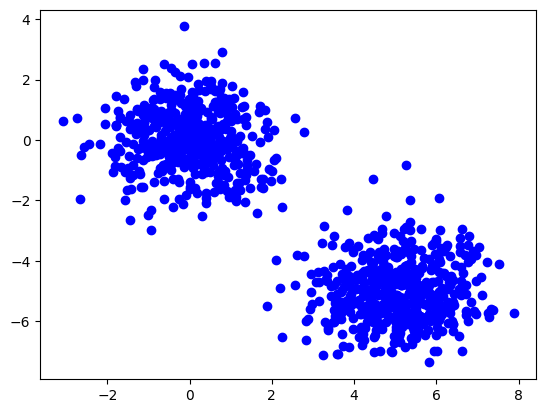

In [3]:
x1, y1 = make_blobs(n_samples=1000,
                   centers=((5,-5),(0,0)))
plt.scatter(x1[:,0],x1[:,1],color='b')
plt.show()

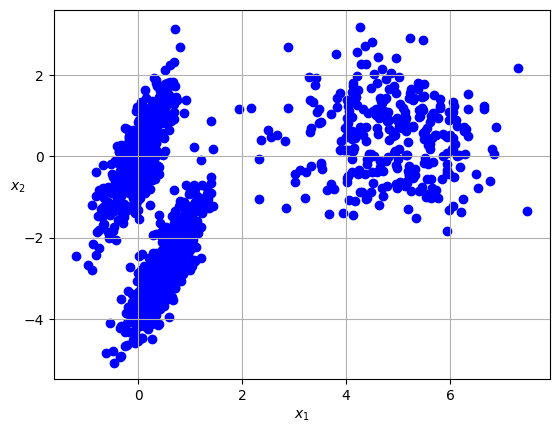

In [4]:
x1 = x1.dot(np.array([[0.3, 0.30], [0.20, 0.85]]))
x2, y2 = make_blobs(n_samples=300, centers=1)
x2 = x2 + [7, -9]
x = np.r_[x1,x2]
y = np.r_[y1,y2]
plt.scatter(x[:,0],x[:,1],color='b')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$",rotation=0)
plt.grid()
plt.show()

In [5]:
# I'll train a Gaussian mixture model on dataset:
gm = GaussianMixture(
    n_components=3,n_init=10
)
gm.fit(x)

GaussianMixture(n_components=3, n_init=10)

In [6]:
# some parameters:
# weights reflect proportions 2 clusters with 1000
# points each while 3rd cluster has 250 points
gm.weights_

array([0.38460309, 0.23135896, 0.38403795])

In [7]:
'''This attribute stores the mean vectors of the Gaussian components in the mixture model.
For a GMM with n_components, gm.means_ is a 2D array of shape (n_components, n_features).
Each row gm.means_[i] represents the mean vector of the i-th Gaussian component.
The mean vector specifies the center of the Gaussian distribution along each feature dimension.
 It represents the location of the peak of the Gaussian component in the feature space.'''
gm.means_

array([[ 0.00497381,  0.02569281],
       [ 4.84430771,  0.47324207],
       [ 0.50456296, -2.72460849]])

In [8]:
'''gm.covariances_ is a 3D array of shape (n_components, n_features, n_features). Each element gm.covariances_[i]
is the covariance matrix of the i-th Gaussian component. The covariance matrix describes the spread and orientation
 of the data along different dimensions. A larger covariance indicates more spread along that dimension, while a
 smaller covariance indicates less spread.'''
gm.covariances_

array([[[ 0.11322405,  0.23200211],
        [ 0.23200211,  0.79460887]],

       [[ 0.97358732, -0.07522916],
        [-0.07522916,  0.95634887]],

       [[ 0.14378695,  0.28189084],
        [ 0.28189084,  0.82913847]]])

In [9]:
gm.converged_ # confirms it converged after 10 iterations (n_init)

True

In [10]:
gm.n_iter_ # Converged in 4 iterations

5

In [11]:
gm.predict(x) # for hard clustering

array([2, 2, 2, ..., 1, 1, 1])

In [12]:
gm.predict_proba(x).round(3) # for soft clustering

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [13]:
'''A Gaussian mixture model is a generative model, so I can sample new instances from it '''
x_sampled, y_sampled = gm.sample(5)
x_sampled

array([[ 3.82346465e-02,  6.74475076e-01],
       [ 2.78604501e-02, -5.03653738e-02],
       [ 2.35167997e-03, -7.77658561e-01],
       [-2.19496875e-01, -5.86858678e-01],
       [ 5.49104498e+00,  1.90751947e+00]])

In [14]:
y_sampled

array([0, 0, 0, 0, 1])

In [15]:
'''I can estimate the density of the model at any given location. for each instance it is given,
 this estimates the log of the probability density function (PDF) at that location. The greater
 the score, the higher the density'''
gm.score_samples(x)

array([-1.59361553, -2.84608507, -1.74760751, ..., -4.26583492,
       -3.35731029, -4.05392156])

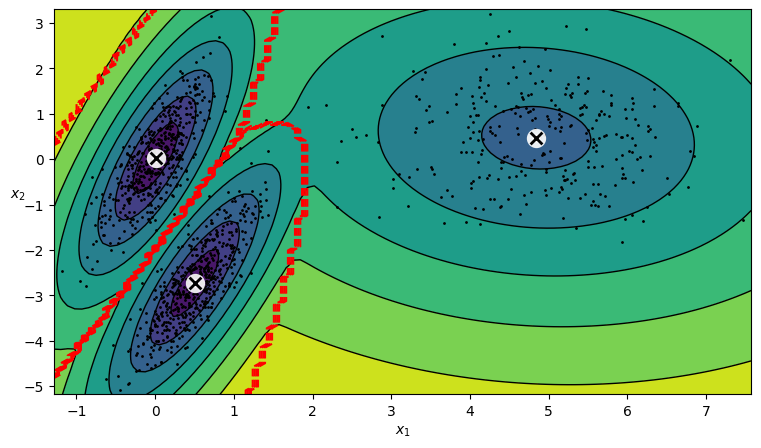

In [25]:
from matplotlib.colors import LogNorm
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        threshold = weights.max() / 10
        centroids = centroids[weights > threshold]

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_gaussian_mixture(cluster,x,resolution = 100,show_ylabels=True):

  pieces = 100
  xmin = x.min(axis=0) - 0.1
  xmax = x.max(axis=0) + 0.1
  xhor = np.linspace(xmin[0],xmax[0],pieces)
  xver = np.linspace(xmin[1],xmax[1],pieces)
  xv,yv = np.meshgrid(xhor,xver)
  z1 = -cluster.score_samples(np.c_[xv.ravel(),yv.ravel()])
  z1=z1.reshape(xv.shape)
  plt.contourf(xv, yv, z1,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
  plt.contour(xv, yv, z1,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')
  plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2) # data points
  z2 = cluster.predict(np.c_[xv.ravel(),yv.ravel()])
  z2 = z2.reshape(xv.shape)
  plt.contour(xv,yv,z2,
              linewidths=1.5, colors='r', linestyles='dashed')
  plot_centroids(cluster.means_,weights=cluster.weights_)
  plt.xlabel("$x_1$")
  if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
plt.figure(figsize=(9, 5))
plot_gaussian_mixture(gm,x)
plt.show()

In [17]:
"""Looks like there are 3 clusters (shown by x)
as expected since data given had 3
clusters as seen above- so great solution"""